In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

In [29]:
#Loading the Historical fires data of Oregon state into a pandas dataframe
historical_fires = pd.read_csv('./data/historical_oregon_fires.csv')

In [30]:
historical_fires.shape

(64053, 89)

In [31]:
historical_fires.head()

,X,Y,OBJECTID,Serial,FireYear,FireNumber,FiscalYear,FireArea,Current_District,Current_Unit,...,Size_class,Size_acres,Size_prot,Homes_Saved,Homes_Lost,Structures_Saved,Structures_Lost,Number_of_Injuries,Number_of_Deaths,CauseType
0,455019.839895,1.432829e+06,1,10,1992,92-511-112-92,1992,NaN,51,511,...,2.0,2.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,0
1,511564.830052,1.364583e+06,2,11,1992,92-511-113-92,1992,NaN,51,511,...,1.0,0.20,0.20,NaN,NaN,NaN,NaN,NaN,NaN,0
2,532614.156168,1.412762e+06,3,13,1992,92-511-115-92,1992,NaN,51,511,...,1.0,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0
3,485919.955381,1.352474e+06,4,14,1992,92-511-116-92,1992,NaN,51,511,...,2.0,3.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,0
4,442251.311024,1.278112e+06,5,15,1992,92-511-117-92,1992,NaN,51,511,...,2.0,1.50,1.50,NaN,NaN,NaN,NaN,NaN,NaN,0


In [32]:
historical_fires.describe().T

,count,mean,std,min,25%,50%,75%,max
X,64053.0,7.703456e+05,5.145695e+05,0.0000,492431.605971,648903.492782,1.036540e+06,2.330063e+06
Y,64053.0,6.554200e+05,4.872065e+05,0.0000,236353.876969,575697.853675,1.076593e+06,1.656678e+06
OBJECTID,64053.0,3.202700e+04,1.849065e+04,1.0000,16014.000000,32027.000000,4.804000e+04,6.405300e+04
Serial,64053.0,4.987656e+04,2.812513e+04,10.0000,29500.000000,45519.000000,6.766000e+04,1.155570e+05
FireYear,64053.0,1.988937e+03,1.686442e+01,1960.0000,1974.000000,1989.000000,2.003000e+03,2.019000e+03
FiscalYear,64053.0,1.989727e+03,1.685892e+01,1960.0000,1975.000000,1990.000000,2.004000e+03,2.020000e+03
FireArea,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_District,64053.0,7.864742e+01,1.496438e+01,51.0000,71.000000,73.000000,9.500000e+01,9.900000e+01
Current_Unit,64053.0,7.883178e+02,1.500064e+02,511.0000,711.000000,732.000000,9.540000e+02,9.910000e+02
FireCategory,64053.0,1.000000e+00,0.000000e+00,1.0000,1.000000,1.000000,1.000000e+00,1.000000e+00


In [33]:
historical_fires.corr()

,X,Y,OBJECTID,Serial,FireYear,FiscalYear,FireArea,Current_District,Current_Unit,FireCategory,...,Size_class,Size_acres,Size_prot,Homes_Saved,Homes_Lost,Structures_Saved,Structures_Lost,Number_of_Injuries,Number_of_Deaths,CauseType
X,1.000000,0.569673,-0.046110,-0.013913,0.270544,0.271425,NaN,0.582209,0.582790,NaN,...,0.041224,0.014888,0.014578,0.018966,0.013644,0.038826,0.032316,-0.003633,-0.007731,-0.004456
Y,0.569673,1.000000,-0.075587,-0.029982,0.249519,0.250744,NaN,-0.035758,-0.034135,NaN,...,0.033210,0.001582,-0.001402,-0.000656,-0.013638,0.011960,0.002634,-0.005990,0.003807,0.012365
OBJECTID,-0.046110,-0.075587,1.000000,0.975739,0.387223,0.386539,NaN,0.061891,0.061911,NaN,...,0.011245,0.021108,0.020731,0.009734,0.020665,0.015485,0.021889,-0.003186,0.002646,0.377476
Serial,-0.013913,-0.029982,0.975739,1.000000,0.512250,0.511511,NaN,0.025019,0.025053,NaN,...,0.014625,0.022499,0.022293,0.010475,0.022059,0.017169,0.023424,-0.003854,0.002525,0.488493
FireYear,0.270544,0.249519,0.387223,0.512250,1.000000,0.999701,NaN,-0.035637,-0.035524,NaN,...,-0.001244,0.022978,0.016213,0.009203,0.021398,0.015568,0.021995,-0.003787,0.001735,0.389611
FiscalYear,0.271425,0.250744,0.386539,0.511511,0.999701,1.000000,NaN,-0.035843,-0.035731,NaN,...,-0.000912,0.023272,0.016663,0.011074,0.023118,0.017463,0.024769,-0.003147,0.002669,0.388431
FireArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_District,0.582209,-0.035758,0.061891,0.025019,-0.035637,-0.035843,NaN,1.000000,0.999978,NaN,...,0.021834,0.010784,0.018210,0.030827,0.008614,0.038056,0.023616,-0.002401,-0.012425,-0.044790
Current_Unit,0.582790,-0.034135,0.061911,0.025053,-0.035524,-0.035731,NaN,0.999978,1.000000,NaN,...,0.022103,0.010873,0.018298,0.031090,0.008595,0.038264,0.023702,-0.002380,-0.012483,-0.044747
FireCategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
historical_fires.columns

Index(['X', 'Y', 'OBJECTID', 'Serial', 'FireYear', 'FireNumber', 'FiscalYear',
       'FireArea', 'Current_District', 'Current_Unit', 'FireName',
       'FireCategory', 'PreparedBy', 'LandmarkLocation', 'Equipment',
       'NumberPersonnel', 'CreationDate', 'ModifiedBy', 'ModifiedDate', 'Twn',
       'Rng', 'Sec', 'Subdiv', 'Longitude', 'Latitude', 'Protection_agency',
       'Federal_lands', 'Land_Class', 'Land_Class_tg', 'Minimum', 'Dual',
       'County', 'FO_Land_Owner', 'LO_Name', 'SurchargeLot',
       'SurchargeLotAssessed', 'SB_360_Lot', 'SB_360_Liable', 'Discovered_By',
       'DiscoveredByName', 'Caused_by', 'General', 'Specific',
       'Cause_Comments', 'Lead_Investigator', 'Degree_certain',
       'General_Restriction', 'Industrial_Restriction', 'Burn_Index',
       'WeatherStationID', 'RegulatedUseZone', 'Involve_op', 'Notif_year',
       'Notif_dist', 'Notif_number', 'Ign_DateTime', 'Discover_DateTime',
       'Report_DateTime', 'Attack_DateTime', 'Control_DateTime',
   

In [35]:
drop_columns = ['OBJECTID', 'Serial'  ,'FireNumber' ,'FiscalYear','FireArea','Current_District', 'Current_Unit', 'FireName',
               'PreparedBy', 'LandmarkLocation', 'Equipment','NumberPersonnel', 'CreationDate', 'ModifiedBy', 'ModifiedDate',
                'Twn', 'Rng', 'Sec', 'Subdiv', 'Longitude', 'Latitude','County','LO_Name','DiscoveredByName','Specific',
                'Cause_Comments','Lead_Investigator', 'Degree_certain','General_Restriction', 'Industrial_Restriction',
                'RegulatedUseZone','Involve_op', 'Notif_year','Notif_dist', 'Notif_number','Report_DateTime', 'Attack_DateTime',
                'Control_DateTime','Walk_In_Delay', 'DS_Cost', 'ES_Cost', 'PC_Cost', 'OA_Cost','TotalCost', 'Est_Damage', 'CostRecovery',
               'AttackBy','AttackType','Size_class','Size_prot', 'Homes_Saved', 'Homes_Lost','Structures_Saved', 'Structures_Lost',
                'Number_of_Injuries','Number_of_Deaths', 'CauseType']

In [36]:
historical_fires.drop(columns=drop_columns,inplace=True)

In [37]:
use_later = ["Burn_Index","WeatherStationID"]
historical_fires.drop(columns=use_later,inplace=True)

In [38]:
#Convert columns to datetime format
historical_fires['Ign_DateTime']=pd.to_datetime(historical_fires['Ign_DateTime'])
historical_fires['Discover_DateTime']=pd.to_datetime(historical_fires['Discover_DateTime'])

In [39]:
historical_fires['fire_dayofyear'] = historical_fires['Discover_DateTime'].dt.dayofyear
#historical_fires['fire_dayofyear'] = historical_fires['fire_dayofyear'].astype(int)

In [41]:
historical_fires = historical_fires.fillna(0)

In [42]:
#Removing time columns
time_columns = ['Ign_DateTime','Discover_DateTime']
historical_fires.drop(columns=time_columns,inplace=True)

In [43]:
historical_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64053 entries, 0 to 64052
Data columns (total 29 columns):
X                       64053 non-null float64
Y                       64053 non-null float64
FireYear                64053 non-null int64
FireCategory            64053 non-null int64
Protection_agency       64053 non-null float64
Federal_lands           64053 non-null float64
Land_Class              64053 non-null float64
Land_Class_tg           64053 non-null float64
Minimum                 64053 non-null int64
Dual                    64053 non-null int64
FO_Land_Owner           64053 non-null float64
SurchargeLot            64053 non-null int64
SurchargeLotAssessed    64053 non-null int64
SB_360_Lot              64053 non-null float64
SB_360_Liable           64053 non-null float64
Discovered_By           64053 non-null float64
Caused_by               64053 non-null float64
General                 64053 non-null float64
FEMA                    64053 non-null int64
Flame_length

In [ ]:
#Converting Burn Index and WeatherStation Index to floats
historical_fires['Burn_Index'] = historical_fires['Burn_Index'].str.replace("[^0-9]", '')
historical_fires['WeatherStationID'] = historical_fires['WeatherStationID'].str.replace("[^0-9]", '')
#Replacing Null values or spaces with zero
historical_fires['Burn_Index'] = historical_fires['Burn_Index'].fillna(0)
historical_fires['WeatherStationID'] = historical_fires['WeatherStationID'].fillna(0)
#converting the columns to type int and float
historical_fires['Burn_Index'] = historical_fires['Burn_Index'].astype(int)
historical_fires['WeatherStationID'] = historical_fires['WeatherStationID'].astype(int)

In [45]:
#The target to predict, area burnt by fire.
historical_fires['Size_acres'].describe()

count     64053.000000
mean         81.130331
std        3343.144286
min           0.000000
25%           0.050000
50%           0.100000
75%           0.500000
max      499945.000000
Name: Size_acres, dtype: float64

In [46]:
#checking for Null Values in the data
historical_fires.isnull().sum()

X                       0
Y                       0
FireYear                0
FireCategory            0
Protection_agency       0
Federal_lands           0
Land_Class              0
Land_Class_tg           0
Minimum                 0
Dual                    0
FO_Land_Owner           0
SurchargeLot            0
SurchargeLotAssessed    0
SB_360_Lot              0
SB_360_Liable           0
Discovered_By           0
Caused_by               0
General                 0
FEMA                    0
Flame_length            0
Size_at_attack          0
Behavior                0
Fuel                    0
Topography              0
Aspect                  0
Slope                   0
Elevation               0
Size_acres              0
fire_dayofyear          0
dtype: int64

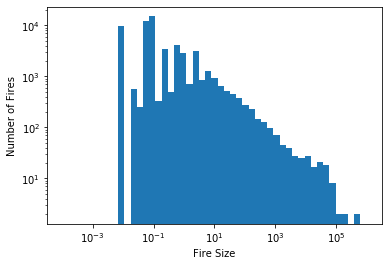

In [47]:
import matplotlib.pyplot as plt
import numpy as np
#Distibution of fire size
plt.hist(historical_fires['Size_acres'], bins=np.logspace(-4,6, 50));
plt.ylabel('Number of Fires')
plt.xlabel('Fire Size')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.show()

In [48]:
#Creating the data for training
Y = historical_fires['Size_acres']
X = historical_fires.drop(columns='Size_acres')

In [49]:
#Normalising the Data
sc = StandardScaler()
X_norm = sc.fit_transform(X)

/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [50]:
#creating the train and test data
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)
print("# Train: {} , #Test: {}".format(X_train.shape[0], X_test.shape[0]))
print("# inputs: {}".format(X_train.shape[1]))
n = X_train.shape[1]

# Train: 51242 , #Test: 12811
# inputs: 28


In [72]:
# Neural network
model = Sequential()
model.add(Dense(28, input_dim=n, kernel_initializer='normal', activation='relu'))
model.add(Dense(56, input_dim=n , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_11 (Dense)             (None, 56)                1624      
_________________________________________________________________
dropout_7 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               7296      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 56)                7224      
_________________________________________________________________
dropout_9 (Dropout)          (None, 56)               

In [73]:
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])

In [74]:
history = model.fit(X_train, y_train, epochs=100, batch_size=640, verbose = 2, validation_split = 0.05, shuffle=True)

Train on 48679 samples, validate on 2563 samples
Epoch 1/100
48679/48679 - 1s - loss: 352.0098 - mse: 15144100.0000 - mae: 352.0097 - val_loss: 39.3155 - val_mse: 839490.1250 - val_mae: 39.3154
Epoch 2/100
48679/48679 - 0s - loss: 102.3288 - mse: 14402062.0000 - mae: 102.3288 - val_loss: 39.3153 - val_mse: 839490.1250 - val_mae: 39.3153
Epoch 3/100
48679/48679 - 0s - loss: 96.8838 - mse: 14400589.0000 - mae: 96.8837 - val_loss: 39.3153 - val_mse: 839489.8125 - val_mae: 39.3153
Epoch 4/100
48679/48679 - 0s - loss: 95.4697 - mse: 14400444.0000 - mae: 95.4697 - val_loss: 39.3154 - val_mse: 839490.1250 - val_mae: 39.3154
Epoch 5/100
48679/48679 - 0s - loss: 94.8455 - mse: 14400218.0000 - mae: 94.8456 - val_loss: 39.3153 - val_mse: 839489.9375 - val_mae: 39.3153
Epoch 6/100
48679/48679 - 0s - loss: 94.4896 - mse: 14400125.0000 - mae: 94.4896 - val_loss: 39.3154 - val_mse: 839490.1250 - val_mae: 39.3154
Epoch 7/100
48679/48679 - 0s - loss: 94.4076 - mse: 14400096.0000 - mae: 94.4076 - val_lo

In [75]:
#Calculating Base Prediction errors
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE


In [76]:
#Base prediction is mean of the y_train
y_base = [np.mean(y_train)]*y_test.shape[0]

In [77]:
#Mean Errors for Base Prediction 
print(f'Mean absolute error for base prediction is {MAE(y_test,y_base)}')
print(f'Mean standard error for base prediction is {MSE(y_test,y_base)}')

Mean absolute error for base prediction is 125.4186405009199
Mean standard error for base prediction is 1029186.8262535932


In [78]:
preds = model.predict(X_test, verbose=1)
_, mse, mae = model.evaluate(X_test, y_test)
print('MSE: %.2f, MAE: %.2f' % (mse,mae))

12811/12811 [==============================] - 0s 18us/sample - loss: 40.8044 - mse: 1028310.7500 - mae: 40.8044
MSE: 1028310.75, MAE: 40.80


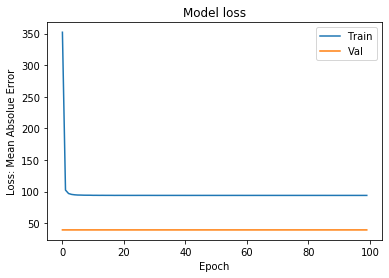

In [79]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss: Mean Absolue Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')